# **Research Questions**

What are the predominant themes and entities discussed in Netnography research literature?

How can AI-driven methods like NER and BERT enhance the analysis of Netnographic studies?

# **Objectives**

Objective 1: Extract and categorize key entities (e.g., organizations, locations, methodologies) from Netnography research papers.

Objective 2: Identify and analyze prevalent themes using BERT-based topic modeling.

Objective 3: Evaluate the effectiveness of AI-driven NLP techniques in processing academic literature.

# **Methodology**

Data Collection: Data collected from Google Drive folder which contains the  research papers on Netnographic Methodology from a vast range of feilds.

Preprocessing: Converting PDFs to text, cleaning the data, and preparing it for analysis.

Named Entity Recognition (NER): Employing SpaCy's pre-trained models to extract entities.

Topic Modeling: Using BERT-based models to identify underlying themes.

Visualization: Generating word clouds and entity frequency charts to visualize findings.



In [ ]:
# Install necessary libraries
!pip install spacy
!pip install transformers
!pip install pdfminer.six
!pip install bertopic
!pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Extraction From PDFs

In [ ]:
import os
from pdfminer.high_level import extract_text

# Define the path to your PDF files
pdf_folder = '/content/drive/MyDrive/netnography/'

# Extract text from each PDF
documents = []
for filename in os.listdir(pdf_folder):
    if filename.endswith('.pdf'):
        file_path = os.path.join(pdf_folder, filename)
        text = extract_text(file_path)
        documents.append(text)


# Named Entity Recognition (NER) with SpaCy

In [ ]:
import spacy
from collections import Counter
import pandas as pd

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Process documents and extract entities
entity_list = []
for doc in documents:
    spacy_doc = nlp(doc)
    for ent in spacy_doc.ents:
        entity_list.append((ent.text, ent.label_))

# Create a DataFrame of entities
entity_df = pd.DataFrame(entity_list, columns=['Entity', 'Label'])

# Display the most common entities
entity_counts = entity_df['Entity'].value_counts().head(10)
print(entity_counts)


Entity
1           921
2020        794
2           744
2021        726
2019        575
2018        562
3           559
Kozinets    531
2017        512
2022        503
Name: count, dtype: int64


# Topic Modeling with BERTopic

In [ ]:
from bertopic import BERTopic

# Initialize BERTopic model
topic_model = BERTopic()

# Fit the model on your documents
topics, probs = topic_model.fit_transform(documents)

# Display the top topics
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,22,-1_the_of_and_to,"[the, of, and, to, in, for, that, is, as, on]",[Chapter 21: Qualitative Social Media Methods:...
1,0,17,0_the_and_of_to,"[the, and, of, to, in, for, that, as, on, is]",[Caught in a net: Opportunities and Challenges...
2,1,11,1_the_of_and_to,"[the, of, and, to, in, tourism, as, is, that, ...",[Contents lists available at ScienceDirect \n\...


from matplotlib import pyplot as plt
_df_0['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Topic', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topic']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Topic', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Topic']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Topic'}, axis=1)
              .sort_values('Topic', ascending=True))
  xs = counted['Topic']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Topic', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Topic'].plot(kind='line', figsize=(8, 4), title='Topic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='Topic', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Count', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

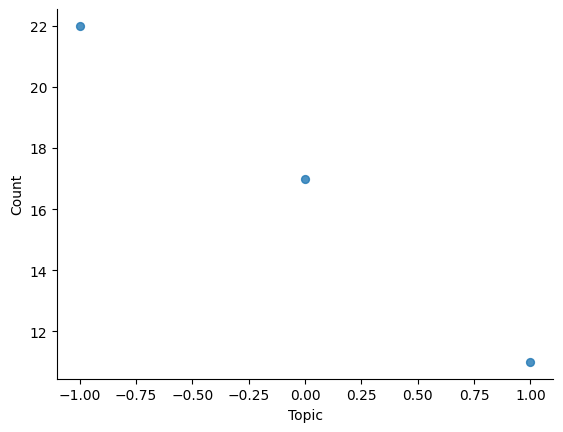

In [ ]:
from matplotlib import pyplot as plt #for 2-d distributions
_df_3.plot(kind='scatter', x='Topic', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

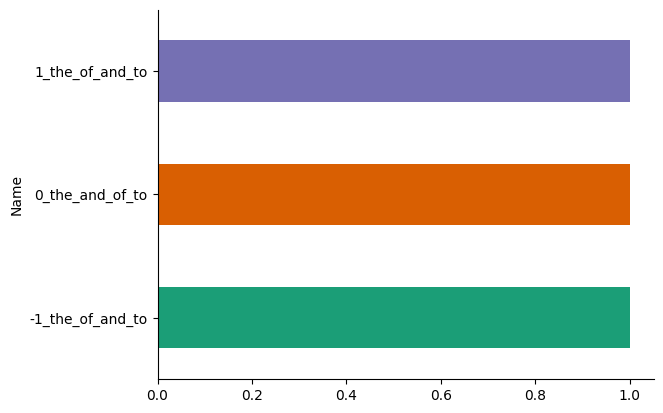

In [ ]:
from matplotlib import pyplot as plt #for categorical distribution
import seaborn as sns
_df_2.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

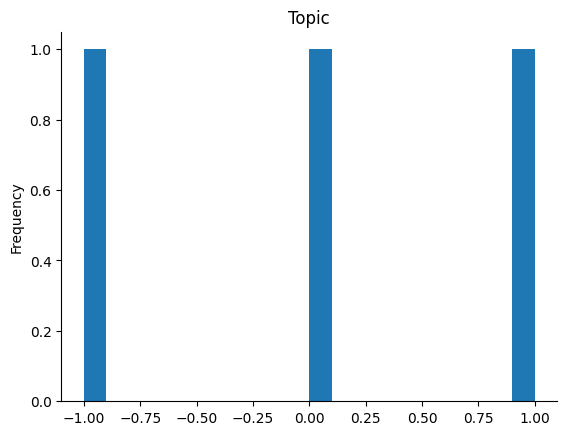

In [ ]:
from matplotlib import pyplot as plt
_df_0['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

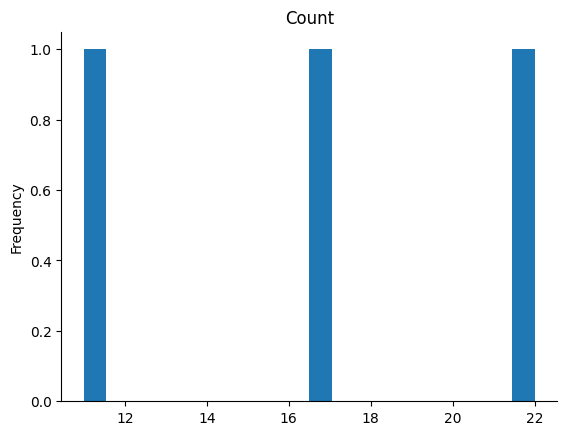

In [ ]:
from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Conclusions

##SpaCy for NER:

SpaCy's pre-trained models can efficiently extract entities like organizations, locations, and methodologies from text.

##BERTopic for Topic Modeling:
BERTopic leverages BERT embeddings to identify coherent topics within your corpus.

##Visualization:
Visual tools help in understanding the distribution and relevance of topics and entities across your dataset.

